NHANES-2015-2016

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [3]:
df=pd.read_csv('NHANES.csv')#loaded
df.DMDEDUC2.value_counts()#occurrances

df.DMDEDUC2.value_counts().sum()

df.shape#(row,col)

pd.isnull(df.DMDEDUC2).sum()


np.int64(261)

Replacing Educational Qualifications

In [4]:
df["DMDEDUC2x"] = df.DMDEDUC2.replace(
    {
        1: "<9",
        2: "9-11",
        3: "HS/GED",
        4: "Some college/AA",
        5: "College",
        7: "Refused",
        9: "Don't know",
    }
)
df.DMDEDUC2x.value_counts()

DMDEDUC2x
Some college/AA    1621
College            1366
HS/GED             1186
<9                  655
9-11                643
Don't know            3
Name: count, dtype: int64

Replacing Genders

In [5]:
x = df.DMDEDUC2x.value_counts()  # x is just a name to hold this value temporarily
x / x.sum()

DMDEDUC2x
Some college/AA    0.296127
College            0.249543
HS/GED             0.216661
<9                 0.119657
9-11               0.117464
Don't know         0.000548
Name: count, dtype: float64

In [6]:
x = df.DMDEDUC2x.value_counts()  # x is just a name to hold this value temporarily
x / x.sum()

DMDEDUC2x
Some college/AA    0.296127
College            0.249543
HS/GED             0.216661
<9                 0.119657
9-11               0.117464
Don't know         0.000548
Name: count, dtype: float64

In [7]:
df['RIAGENDRx']=df.RIAGENDR.replace({1:"Male",2:"Female"})
df.RIAGENDRx.value_counts()

RIAGENDRx
Female    2976
Male      2759
Name: count, dtype: int64

Calculating Missing

In [8]:
df["DMDEDUC2x"] = df.DMDEDUC2x.fillna("Missing")
x = df.DMDEDUC2x.value_counts()
x / x.sum()

DMDEDUC2x
Some college/AA    0.282650
College            0.238187
HS/GED             0.206800
<9                 0.114211
9-11               0.112119
Missing            0.045510
Don't know         0.000523
Name: count, dtype: float64

NUMERICAL SUMMARY

In [9]:
df["BMXWT"].dropna().describe()

count    5666.000000
mean       81.342676
std        21.764409
min        32.400000
25%        65.900000
50%        78.200000
75%        92.700000
max       198.900000
Name: BMXWT, dtype: float64

In [10]:
# using numpy pandas
x=df["BMXWT"].dropna()

# mean
print(x.mean())
print(np.mean(x))

print(x.median())

print(np.percentile(x,25))
print(np.percentile(x,50))
print(np.percentile(x,75))

print(x.quantile(.75))


81.34267560889516
81.34267560889516
78.2
65.9
78.2
92.7
92.7


BLOOD PRESSURE

In [11]:
np.mean((df.BPXSY1>=120) & (df.BPXSY1<=139))

np.mean((df.BPXDI1>=80) & (df.BPXDI2<=89))

np.float64(0.14803836094158676)

In [12]:
a=(df.BPXSY1>=120) & (df.BPXSY1<=139)
b=(df.BPXDI1>=80) & (df.BPXDI2<=89)

print(np.mean(a|b))

0.43487358326068004


SEABORN STARTED

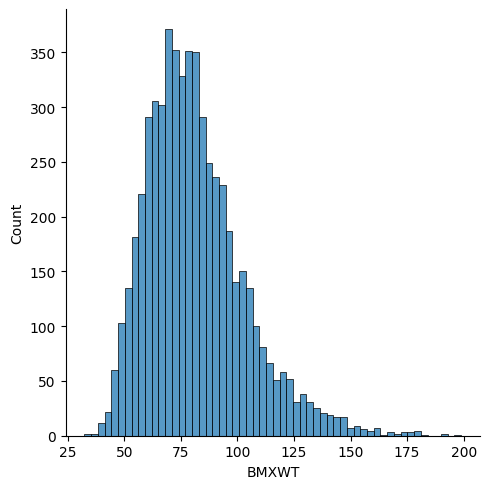

In [13]:
sns.displot(df.BMXWT.dropna())

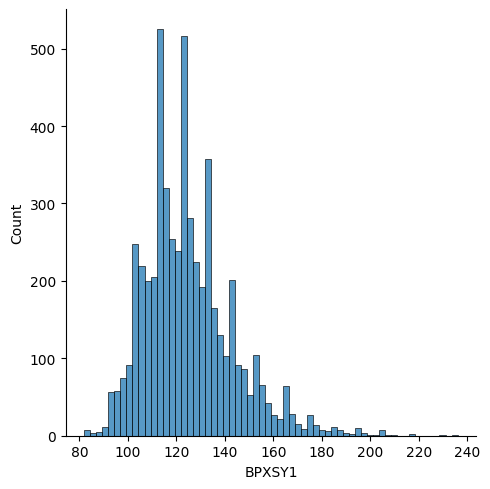

In [14]:
sns.displot(df.BPXSY1.dropna())

Text(0, 0.5, 'Blood Pressure in mm-Hg')

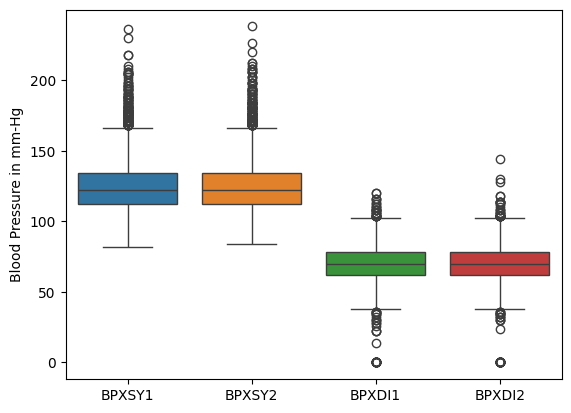

In [15]:
bp=sns.boxplot(data=df.loc[:,["BPXSY1", "BPXSY2", "BPXDI1", "BPXDI2"]])
bp.set_ylabel('Blood Pressure in mm-Hg')

Creating District Intervals

<Axes: xlabel='agegrp', ylabel='BPXSY1'>

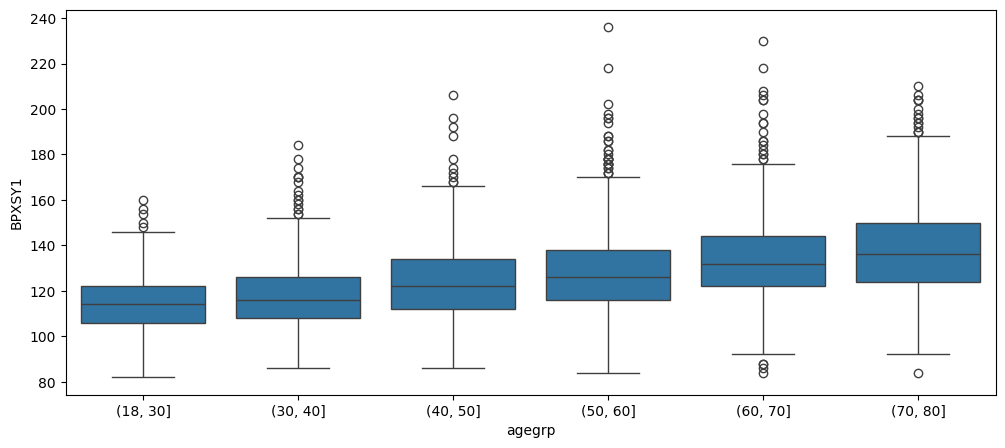

In [16]:

df['agegrp']=pd.cut(df.RIDAGEYR,[18, 30 ,40 ,50,60,70,80])
plt.figure(figsize=(12,5))
sns.boxplot(x='agegrp', y='BPXSY1', data=df)

<Axes: xlabel='agegrp', ylabel='BPXSY1'>

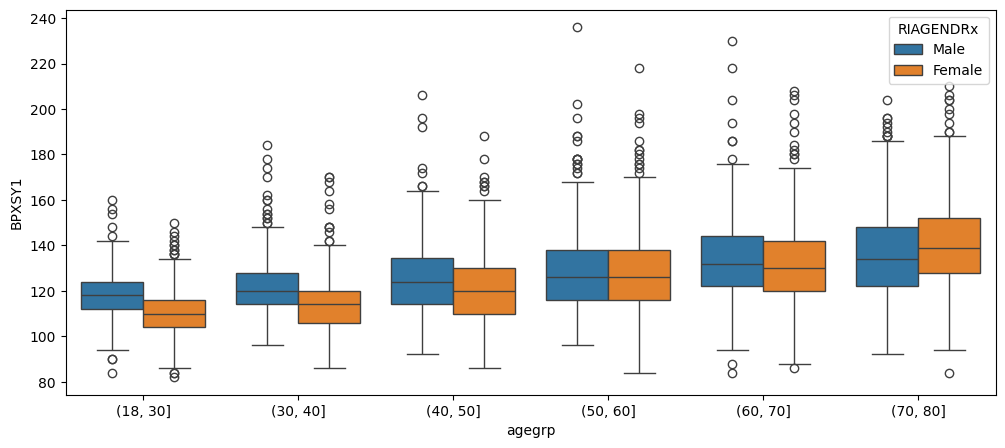

In [17]:
df['agegrp']=pd.cut(df.RIDAGEYR,[18, 30 ,40 ,50,60,70,80])
plt.figure(figsize=(12,5))
sns.boxplot(x='agegrp', y='BPXSY1', hue='RIAGENDRx', data=df)

<Axes: xlabel='RIAGENDRx', ylabel='BPXSY1'>

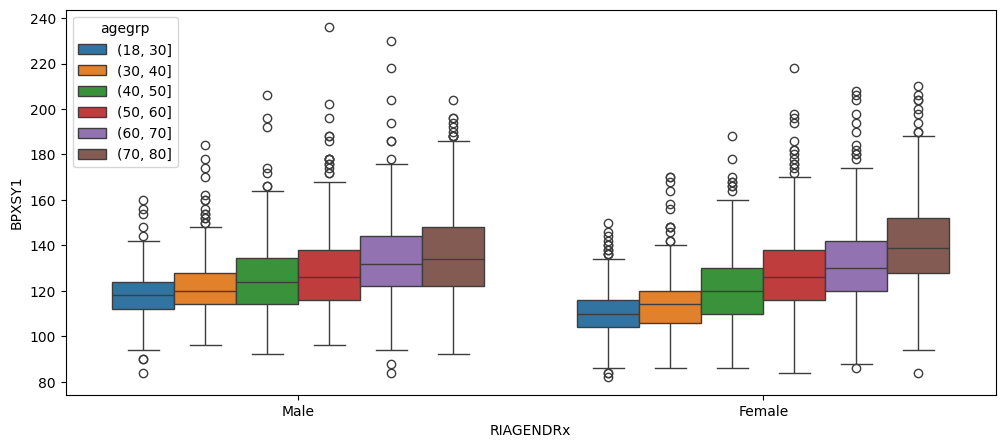

In [18]:
df['agegrp']=pd.cut(df.RIDAGEYR,[18, 30 ,40 ,50,60,70,80])
plt.figure(figsize=(12,5))
sns.boxplot(x='RIAGENDRx', y='BPXSY1', hue='agegrp', data=df)

In [19]:
df.groupby("agegrp")['DMDEDUC2x'].value_counts()

C:\Users\Asus\AppData\Local\Temp\ipykernel_3096\2548382084.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("agegrp")['DMDEDUC2x'].value_counts()


agegrp    DMDEDUC2x      
(18, 30]  Some college/AA    364
          College            278
          HS/GED             237
          Missing            128
          9-11                99
          <9                  47
          Don't know           0
(30, 40]  Some college/AA    282
          College            264
          HS/GED             182
          9-11               111
          <9                  93
          Don't know           0
          Missing              0
(40, 50]  Some college/AA    262
          College            260
          HS/GED             171
          9-11               112
          <9                  98
          Don't know           0
          Missing              0
(50, 60]  Some college/AA    258
          College            220
          HS/GED             220
          9-11               122
          <9                 104
          Don't know           0
          Missing              0
(60, 70]  Some college/AA    238
          HS/GED 

In [20]:
dx=df.loc[~df.DMDEDUC2x.isin(["Don't know", "Missing"])]
dx=dx.groupby(["agegrp","RIAGENDRx"])['DMDEDUC2x']
dx=dx.value_counts()
dx=dx.unstack()


C:\Users\Asus\AppData\Local\Temp\ipykernel_3096\3208534414.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dx=dx.groupby(["agegrp","RIAGENDRx"])['DMDEDUC2x']
